# Prophet final simulation

In [34]:
CHANGE = "constant"

In [35]:
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_from_json
import json
import plotly.graph_objs as go
import plotly.io as pio

# Load your saved Prophet model from JSON
with open('/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/predictions/Prophet/prophet_model.json', 'r') as fin:
    model = model_from_json(fin.read())

# Load the data with covariates
df = pd.read_csv(f'../final_df_{CHANGE}.csv')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data to include one year before the forecast start date
forecast_start_date = '2024-06-28'
one_year_earlier = pd.to_datetime(forecast_start_date) - pd.DateOffset(years=2)
historical_data = df[(df['Date'] >= one_year_earlier) &
                     (df['Date'] <= forecast_start_date)]

# Filter the data to only include rows after June 2024 for the actual forecasting
future_data = df[df['Date'] > '2024-07-28']

# Ensure the 'ds' and 'y' columns are set up for Prophet
future_data = future_data.rename(
    columns={'Date': 'ds', 'Day_ahead_price (€/MWh)': 'y'})

# Use future_data without the target 'y' for forecasting
future_covariates = future_data.drop(columns=['y'])

# Make future predictions using the loaded model
forecast = model.predict(future_covariates)

# Plot the forecasted results
# Historical data for the past year
trace_historical = go.Scatter(
    x=df['Date'],
    y=df['Day_ahead_price (€/MWh)'],
    mode='lines',
    name='Historical',
    line=dict(color='black')
)

# Forecasted results
trace_predicted = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Predicted',
    line=dict(color='blue')
)

trace_upper = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    mode='lines',
    name='Upper Confidence Interval',
    line=dict(color='lightblue', width=0),
    fill='tonexty',
    fillcolor='rgba(173,216,230,0.3)'
)

trace_lower = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    mode='lines',
    name='Lower Confidence Interval',
    line=dict(color='lightblue', width=0),
    showlegend=False,
    fill='tonexty',
    fillcolor='rgba(173,216,230,0.3)'
)

# Create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace_historical)
fig.add_trace(trace_predicted)
fig.add_trace(trace_upper)
fig.add_trace(trace_lower)

# Customize the layout
fig.update_layout(
    title=f'Prophet forecast for {CHANGE} trend of BEVs',
    xaxis_title='Date',
    yaxis_title='Day-ahead Price (€/MWh)',
    xaxis=dict(
        # Set x-axis to start at January 1, 2023
        range=['2023-01-01', forecast['ds'].max()]
    ),
    yaxis=dict(
        range=[0, 220]  # Set y-axis range with a cutoff slightly above 200
    ),
    legend=dict(x=1.05, y=1),
    margin=dict(t=60, b=20, l=20, r=20),  # Increase top margin (t) to 60
    width=1200,
    height=450
)


# Show the plot
pio.show(fig)

In [36]:
# Save the plot as .png
pio.write_image(fig, f'forecast_prophet_{CHANGE}.png')

In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascension Day,Ascension Day_lower,Ascension Day_upper,BEV_vehicles,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-07-29,59.029656,54.929799,97.623721,59.029656,59.029656,0.0,0.0,0.0,-0.108554,...,-2.943633,-2.943633,-2.943633,-3.813326,-3.813326,-3.813326,0.0,0.0,0.0,75.996435
1,2024-07-30,59.031802,52.111409,96.412517,59.031802,59.031802,0.0,0.0,0.0,-0.108554,...,0.986091,0.986091,0.986091,-4.278752,-4.278752,-4.278752,0.0,0.0,0.0,75.686986
2,2024-07-31,59.033947,48.364507,93.049789,59.033947,59.033947,0.0,0.0,0.0,-0.064973,...,2.806668,2.806668,2.806668,-4.607413,-4.607413,-4.607413,0.0,0.0,0.0,71.697511
3,2024-08-01,59.036092,46.999812,91.422714,59.036092,59.036092,0.0,0.0,0.0,2.275973,...,4.494864,4.494864,4.494864,-4.768946,-4.768946,-4.768946,0.0,0.0,0.0,69.264530
4,2024-08-02,59.038237,44.714999,87.357075,59.038237,59.038237,0.0,0.0,0.0,2.275973,...,4.448729,4.448729,4.448729,-4.753052,-4.753052,-4.753052,0.0,0.0,0.0,65.416532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2026-07-27,60.591389,76.081466,119.327778,58.141784,62.777046,0.0,0.0,0.0,1.843272,...,-2.943633,-2.943633,-2.943633,-2.375070,-2.375070,-2.375070,0.0,0.0,0.0,98.379737
729,2026-07-28,60.593535,69.222389,111.098890,58.142493,62.783449,0.0,0.0,0.0,1.843272,...,0.986091,0.986091,0.986091,-2.962386,-2.962386,-2.962386,0.0,0.0,0.0,90.582323
730,2026-07-29,60.595680,73.047897,114.568000,58.143201,62.789851,0.0,0.0,0.0,1.843272,...,2.806668,2.806668,2.806668,-3.543289,-3.543289,-3.543289,0.0,0.0,0.0,93.570064
731,2026-07-30,60.597825,67.520473,111.517431,58.143910,62.796254,0.0,0.0,0.0,1.843272,...,4.494864,4.494864,4.494864,-4.060555,-4.060555,-4.060555,0.0,0.0,0.0,89.334963


In [38]:
results = forecast[["ds", "yhat"]]
# rename yhat to y_hat_{CHANGE}
results = results.rename(columns={"yhat": f"yhat_{CHANGE}"})
results.to_csv(f'prophet_results_{CHANGE}.csv', index=False)

## Plotting all results together

In [39]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio

# Load the CSV files
df_constant = pd.read_csv('prophet_results_constant.csv')
df_decline = pd.read_csv('prophet_results_decline.csv')
df_growth = pd.read_csv('prophet_results_growth.csv')

# Merge them on the 'ds' column
merged_df = df_constant.merge(
    df_decline, on='ds', suffixes=('_constant', '_decline'))
merged_df = merged_df.merge(df_growth, on='ds')
merged_df.rename(columns={'yhat': 'yhat_growth'}, inplace=True)

print(merged_df.head())

# Plot the results
trace_constant = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_constant'],
    mode='lines',
    name='Constant Scenario',
    line=dict(color='blue')
)

trace_decline = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_decline'],
    mode='lines',
    name='Decline Scenario',
    line=dict(color='red')
)

trace_growth = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_growth'],
    mode='lines',
    name='Growth Scenario',
    line=dict(color='green')
)

# Create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace_constant)
fig.add_trace(trace_decline)
fig.add_trace(trace_growth)

# Customize the layout
fig.update_layout(
    title='Forecast Comparison for Different Scenarios',
    xaxis_title='Date',
    yaxis_title='Day-ahead Price (€/MWh)',
    legend=dict(x=1.05, y=1),
    margin=dict(t=60, b=20, l=20, r=20),
    width=1200,
    height=450
)

# Show the plot
pio.show(fig)

# Save the plot as .png
pio.write_image(fig, 'forecast_comparison.png')

           ds  yhat_constant  yhat_decline  yhat_growth
0  2024-07-29      75.996435     75.971532    76.058695
1  2024-07-30      75.686986     75.662083    75.749245
2  2024-07-31      71.697511     71.674164    71.753544
3  2024-08-01      69.264530     68.761787    70.519053
4  2024-08-02      65.416532     64.913789    66.671055


In [40]:
merged_df

# save a csv
merged_df.to_csv('forecast_comparison.csv', index=False)

In [55]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import scienceplots
import matplotlib.pyplot as plt

# Apply the SciencePlots style
plt.style.use(['science', 'no-latex'])


# Plot the original forecasts with customized styles
trace_true = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['Day_ahead_price (€/MWh)'],
    mode='lines',
    name='Historical Data Day Ahead Prices',
    line=dict(color='black', width=2)
)

trace_constant = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_constant'],
    mode='lines',
    name='Constant Scenario',
    line=dict(color='black', dash='solid', width=2)
)

trace_decline = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_decline'],
    mode='lines',
    name='Decline Scenario',
    line=dict(color='darkred', dash='dash', width=2)
)

trace_growth = go.Scatter(
    x=merged_df['ds'],
    y=merged_df['yhat_growth'],
    mode='lines',
    name='Growth Scenario',
    line=dict(color='darkgoldenrod', dash='dashdot', width=2)
)

# Create the figure and add all traces
fig = go.Figure()
fig.add_trace(trace_true)
fig.add_trace(trace_constant)
fig.add_trace(trace_decline)
fig.add_trace(trace_growth)

# Customize the layout with a style similar to the provided plot
fig.update_layout(
    title='Forecast Comparison with Scenario Differences',
    xaxis_title='Date',
    yaxis_title='Number of Registered BEV',  # Modify title to match your style
    xaxis=dict(
        range=['2024-01-01', merged_df['ds'].max()],
        tickformat='%Y-%m',  # Format date labels
        showgrid=True,
        gridcolor='lightgrey',
        tickangle=45
    ),
    yaxis=dict(range=[-10, 130]),
    legend=dict(
        x=0.02,   # Position the legend inside the plot area
        y=0.98,
        # Semi-transparent white background
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="black",
        borderwidth=1,
        font=dict(size=12)
    ),
    margin=dict(t=60, b=40, l=40, r=20),
    width=1200,
    height=600
)

# Show the plot
pio.show(fig)

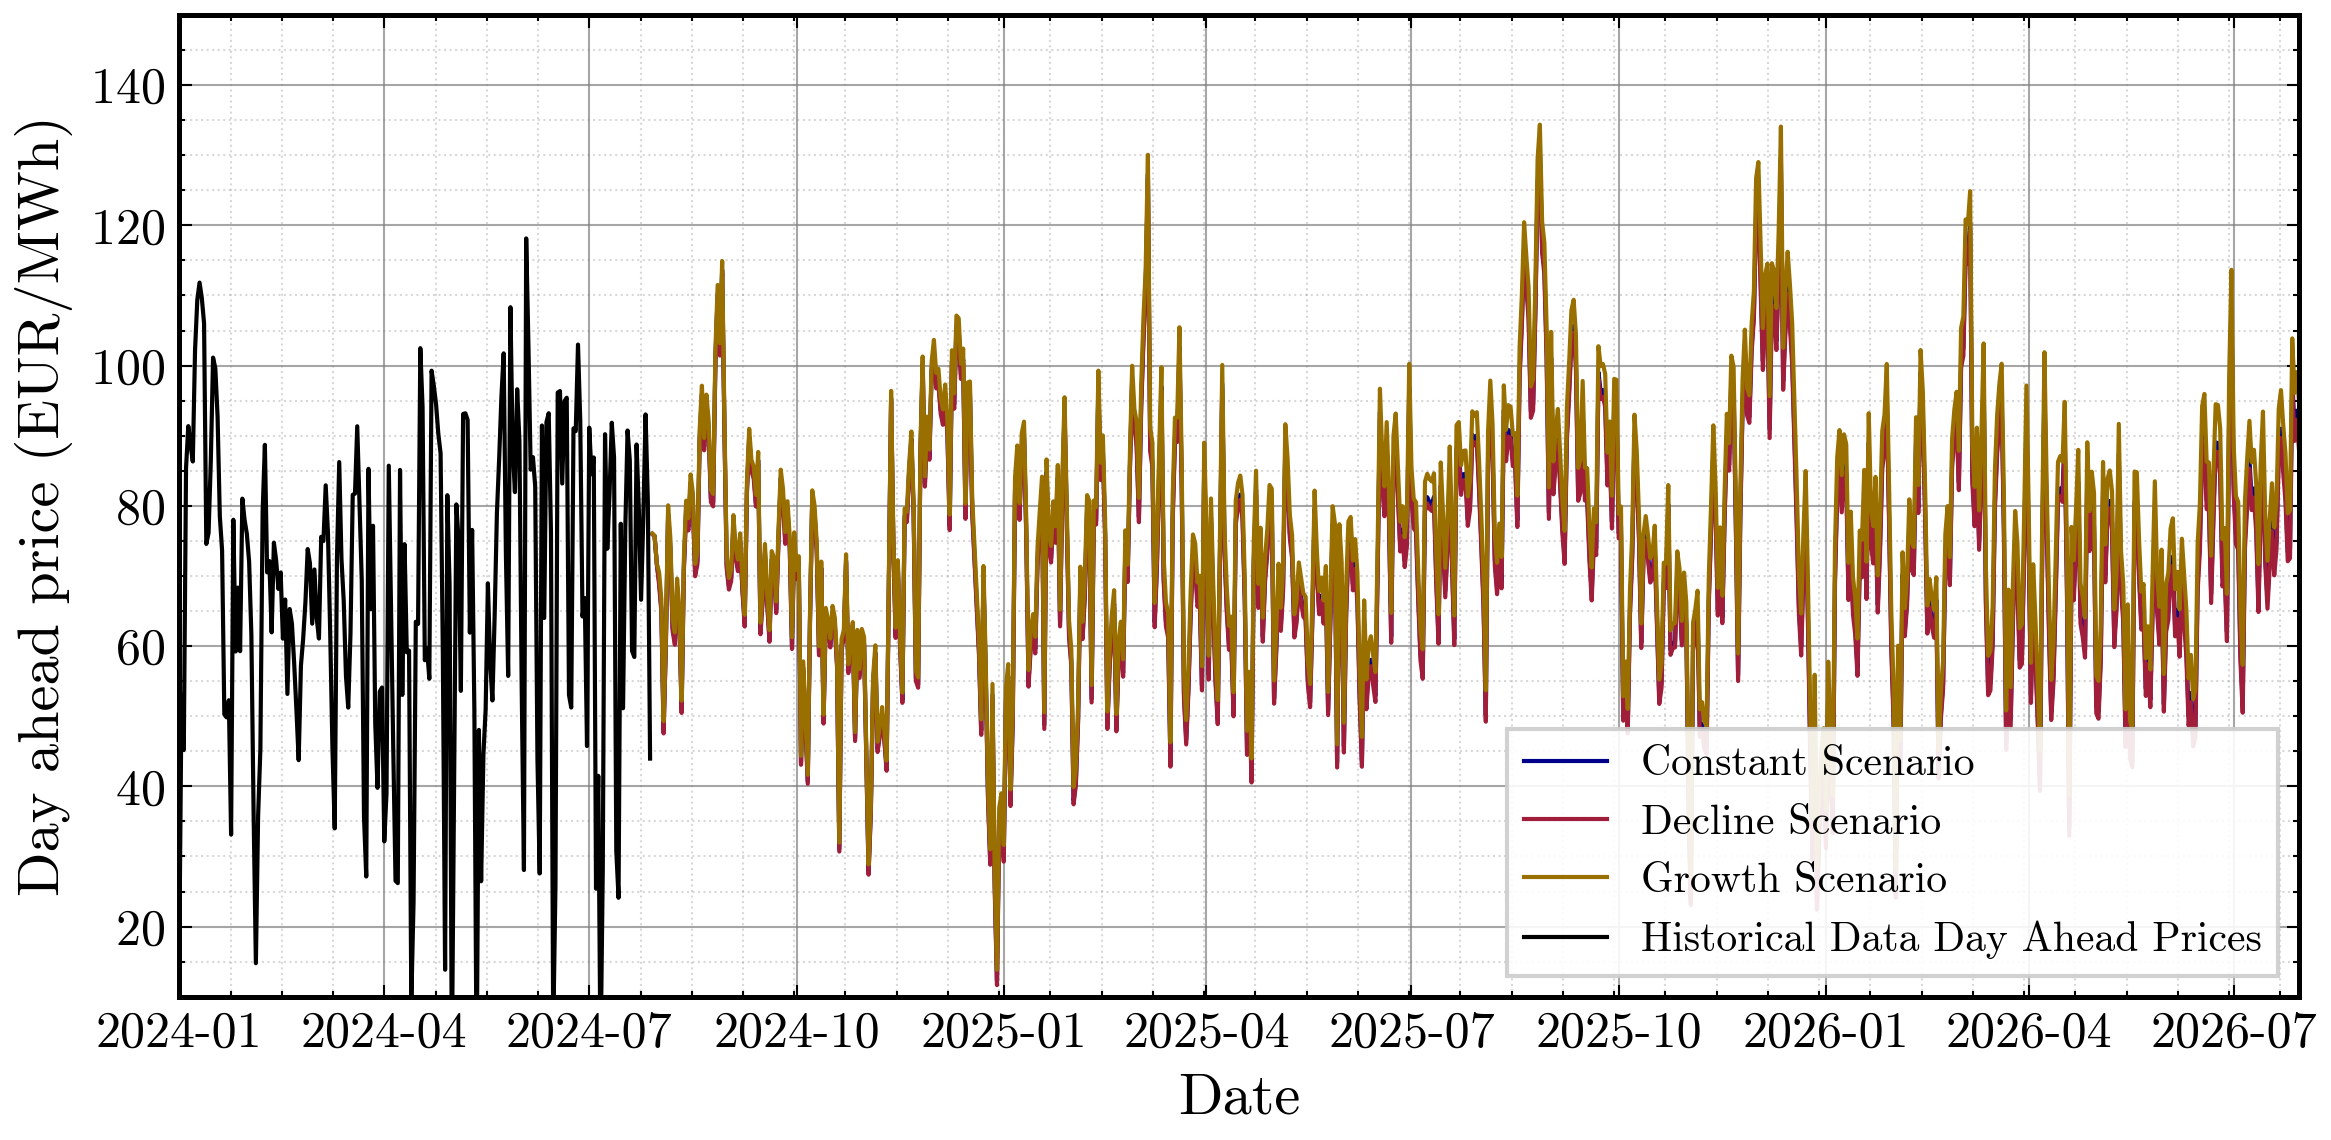

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots  # Import scienceplots package

# Load the CSV files
df_constant = pd.read_csv('prophet_results_constant.csv', index_col='ds')
df_decline = pd.read_csv('prophet_results_decline.csv', index_col='ds')
df_growth = pd.read_csv('prophet_results_growth.csv', index_col='ds')
# Load true forecast values
df_true = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_no_lags.csv')

# Select only the Day-ahead price column and the Date column for df_true
df_true = df_true[['Date', 'Day_ahead_price (€/MWh)']]
df_true.rename(columns={'Date': 'ds'}, inplace=True)
df_true.set_index('ds', inplace=True)

# Merge dataframes on the 'ds' column
merged_df = df_constant.merge(
    df_decline, on='ds', suffixes=('_constant', '_decline'))
merged_df = merged_df.merge(df_growth, on='ds')
merged_df = pd.concat([df_true, merged_df], axis=0)
merged_df.reset_index(inplace=True)

# Ensure 'ds' is in datetime format
merged_df['ds'] = pd.to_datetime(merged_df['ds'])

# Apply the SciencePlots style
plt.style.use(['science', 'no-latex'])

# Set figure properties
# Set figure properties with reduced size
plt.figure(figsize=(8, 4), dpi=300)  # Adjusted figsize for a smaller plot


# Plot each scenario with specified colors and line styles
plt.plot(merged_df['ds'], merged_df['yhat_constant'],
         label='Constant Scenario', color='darkblue', linewidth=1, linestyle='-')
plt.plot(merged_df['ds'], merged_df['yhat_decline'],
         label='Decline Scenario', color='#A11E3B', linewidth=1, linestyle='-')
plt.plot(merged_df['ds'], merged_df['yhat_growth'],
         label='Growth Scenario', color='#997000', linewidth=1, linestyle='-')

# Plot the true forecast values if available
if 'Day_ahead_price (€/MWh)' in merged_df.columns:
    plt.plot(merged_df['ds'], merged_df['Day_ahead_price (€/MWh)'],
             label='Historical Data Day Ahead Prices', color='black', linewidth=1)

# Customize axis labels and their font sizes
# Adjust x-axis label font size
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Day ahead price (EUR/MWh)", fontsize=14,
           fontweight='bold')  # Adjust y-axis label font size

# Adjust the range of the x-axis and y-axis
# Set x-axis range
plt.xlim([pd.Timestamp('2024-01-01'), pd.Timestamp('2026-07-30')])
plt.ylim([10, 150])  # Set y-axis range based on data range

# Adjust tick label font size for x and y axes
plt.tick_params(axis='x', labelsize=12)  # Set x-axis tick label size
plt.tick_params(axis='y', labelsize=12)  # Set y-axis tick label size

# Add legend in the bottom right corner
plt.legend(
    fontsize=10, title_fontsize='12',
    loc='lower right', frameon=True, fancybox=False, shadow=False, framealpha=0.9
)

# Customize grid and make plot borders more visible
plt.grid(True, which='major', linestyle='-',
         linewidth=0.5, color='gray', alpha=0.7)
plt.grid(True, which='minor', linestyle=':',
         linewidth=0.5, color='gray', alpha=0.3)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Locator attempting to generate 3344 ticks ([15080.25, ..., 20930.5]), which exceeds Locator.MAXTICKS (1000).


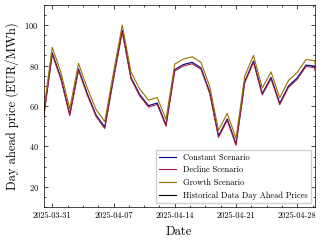

In [ ]:
# Plot each scenario with reduced line widths
plt.plot(merged_df['ds'], merged_df['yhat_constant'],
         label='Constant Scenario', color='darkblue', linewidth=0.8, linestyle='-')
plt.plot(merged_df['ds'], merged_df['yhat_decline'],
         label='Decline Scenario', color='#A11E3B', linewidth=0.8, linestyle='-')
plt.plot(merged_df['ds'], merged_df['yhat_growth'],
         label='Growth Scenario', color='#997000', linewidth=0.8, linestyle='-')

# Plot the true forecast values with reduced line width
if 'Day_ahead_price (€/MWh)' in merged_df.columns:
    plt.plot(merged_df['ds'], merged_df['Day_ahead_price (€/MWh)'],
             label='Historical Data Day Ahead Prices', color='black', linewidth=0.8)

# Adjust axis labels and ticks with reduced font sizes
plt.xlabel("Date", fontsize=9, fontweight='bold')  # Reduced font size
plt.ylabel("Day ahead price (EUR/MWh)", fontsize=9, fontweight='bold')
# plt.tick_params(axis='x', labelsize=6, labelcolor='black')
# Select specific ticks (e.g., monthly intervals)
date_ticks = pd.date_range(start='2025-03-30', end='2025-04-30', freq='W-MON')
# Rotate tick labels for clarity
plt.xticks(date_ticks, rotation=0, fontsize=6)
plt.tick_params(axis='y', labelsize=6)
# Set x-axis range
plt.xlim([pd.Timestamp('2025-03-30'), pd.Timestamp('2025-04-30')])
plt.ylim([10, 110])  # Set y-axis range based on data range

# Add legend with smaller font size
plt.legend(
    fontsize=6, title_fontsize='10',
    loc='lower right', frameon=True, fancybox=False, shadow=False, framealpha=0.9
)

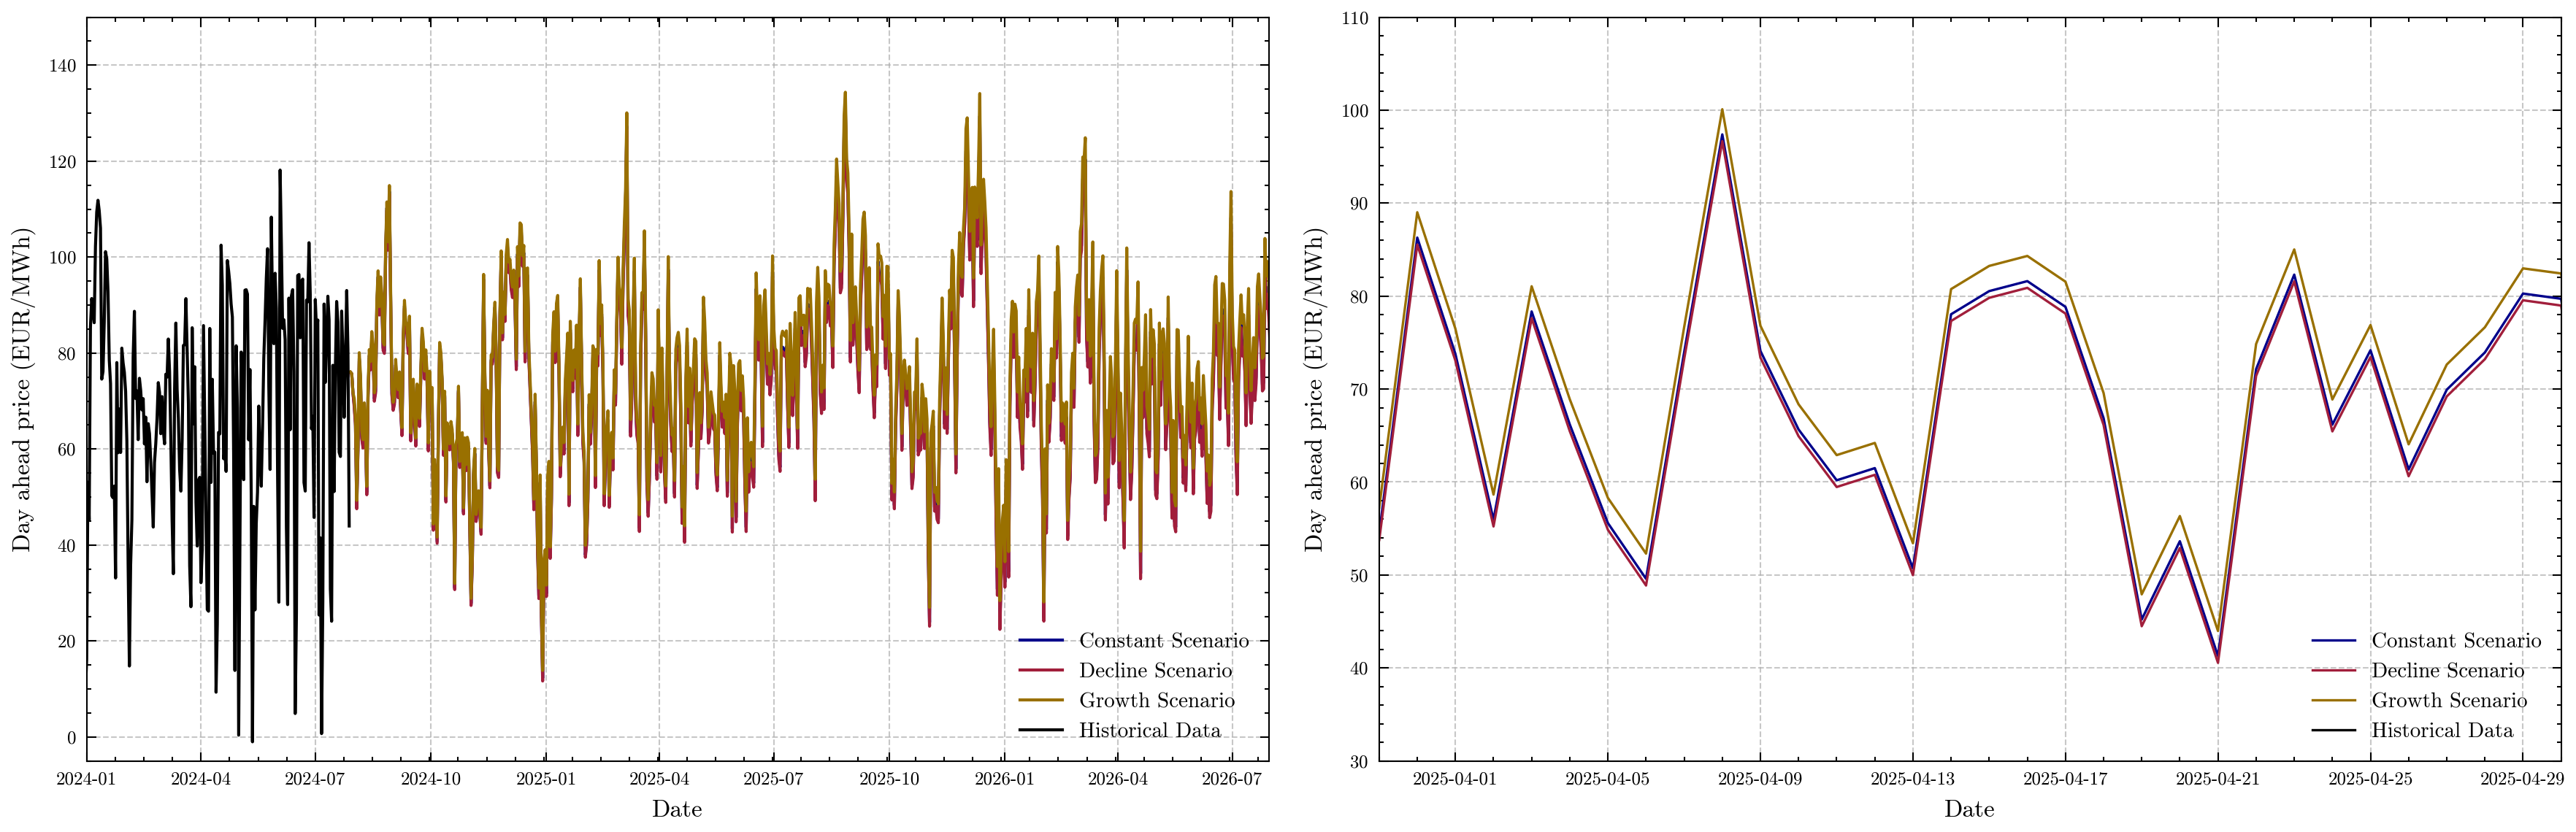

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

# Merge dataframes and prepare them
merged_df = df_constant.merge(
    df_decline, on='ds', suffixes=('_constant', '_decline'))
merged_df = merged_df.merge(df_growth, on='ds')
merged_df = pd.concat([df_true, merged_df], axis=0)
merged_df.reset_index(inplace=True)
merged_df['ds'] = pd.to_datetime(merged_df['ds'])

# Apply SciencePlots style
plt.style.use(['science', 'no-latex'])

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=300)  # 1 row, 2 columns

# Plot 1: Larger plot with a broader range
axes[0].plot(merged_df['ds'], merged_df['yhat_constant'],
             label='Constant Scenario', color='darkblue', linewidth=1, linestyle='-')
axes[0].plot(merged_df['ds'], merged_df['yhat_decline'],
             label='Decline Scenario', color='#A11E3B', linewidth=1, linestyle='-')
axes[0].plot(merged_df['ds'], merged_df['yhat_growth'],
             label='Growth Scenario', color='#997000', linewidth=1, linestyle='-')
if 'Day_ahead_price (€/MWh)' in merged_df.columns:
    axes[0].plot(merged_df['ds'], merged_df['Day_ahead_price (€/MWh)'],
                 label='Historical Data', color='black', linewidth=1)
axes[0].set_xlabel("Date", fontsize=8, fontweight='bold')
axes[0].set_ylabel("Day ahead price (EUR/MWh)", fontsize=8, fontweight='bold')
axes[0].set_xlim([pd.Timestamp('2024-01-01'), pd.Timestamp('2026-07-30')])
axes[0].set_ylim([-5, 150])
axes[0].tick_params(axis='x', labelsize=6)
axes[0].tick_params(axis='y', labelsize=6)
axes[0].legend(fontsize=7, loc='lower right')
# axes[0].set_title("Scenario Forecast - Full Prediction Period", fontsize=12, fontweight='bold')
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 2: Smaller plot with a focused range
axes[1].plot(merged_df['ds'], merged_df['yhat_constant'],
             label='Constant Scenario', color='darkblue', linewidth=0.8, linestyle='-')
axes[1].plot(merged_df['ds'], merged_df['yhat_decline'],
             label='Decline Scenario', color='#A11E3B', linewidth=0.8, linestyle='-')
axes[1].plot(merged_df['ds'], merged_df['yhat_growth'],
             label='Growth Scenario', color='#997000', linewidth=0.8, linestyle='-')
if 'Day_ahead_price (€/MWh)' in merged_df.columns:
    axes[1].plot(merged_df['ds'], merged_df['Day_ahead_price (€/MWh)'],
                 label='Historical Data', color='black', linewidth=0.8)
axes[1].set_xlabel("Date", fontsize=8, fontweight='bold')
axes[1].set_ylabel("Day ahead price (EUR/MWh)", fontsize=8, fontweight='bold')
axes[1].set_xlim([pd.Timestamp('2025-03-30'), pd.Timestamp('2025-04-30')])
axes[1].set_ylim([30, 110])
axes[1].tick_params(axis='x', labelsize=6)
axes[1].tick_params(axis='y', labelsize=6)
axes[1].legend(fontsize=7, loc='lower right')
# axes[1].set_title("Scenario Forecast - Focused Range", fontsize=10, fontweight='bold')
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for spacing
plt.tight_layout()

# Save the figure for use in your master thesis
plt.savefig("scenario_forecast_comparison.png", dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

In [98]:
# drop all rows where yhat_constant is NaN
merged_df = merged_df.dropna(subset=['yhat_constant'])

# Drop the 'Day_ahead_price (€/MWh)' column
merged_df = merged_df.drop(columns=['Day_ahead_price (€/MWh)'])

merged_df

,ds,yhat_constant,yhat_decline,yhat_growth
4586,2024-07-29,75.996435,75.971532,76.058695
4587,2024-07-30,75.686986,75.662083,75.749245
4588,2024-07-31,71.697511,71.674164,71.753544
4589,2024-08-01,69.264530,68.761787,70.519053
4590,2024-08-02,65.416532,64.913789,66.671055
...,...,...,...,...
5314,2026-07-27,98.379737,97.058285,103.886563
5315,2026-07-28,90.582323,89.260872,96.089150
5316,2026-07-29,93.570064,92.248612,99.076890
5317,2026-07-30,89.334963,88.013511,94.841789


## Computing some metrics 

In [58]:
# Compute the differences between each scenario
merged_df['diff_constant_decline'] = merged_df['yhat_constant'] - \
    merged_df['yhat_decline']
merged_df['diff_constant_growth'] = merged_df['yhat_constant'] - \
    merged_df['yhat_growth']
merged_df['diff_decline_growth'] = merged_df['yhat_decline'] - \
    merged_df['yhat_growth']

# Compute the mean for each diff
mean_diff_constant_decline = merged_df['diff_constant_decline'].mean()
mean_diff_constant_growth = merged_df['diff_constant_growth'].mean()
mean_diff_decline_growth = merged_df['diff_decline_growth'].mean()

mean_decline = merged_df['yhat_decline'].mean()
mean_growth = merged_df['yhat_growth'].mean()
mean_constant = merged_df['yhat_constant'].mean()

print(mean_decline, mean_growth, mean_constant)

72.76361094013826 76.67445708625924 73.59298334627759


In [59]:
print(mean_diff_constant_decline,
      mean_diff_constant_growth, mean_diff_decline_growth)

0.829372406139334 -3.0814737399816425 -3.9108461461209765


In [60]:
# add the name of the weekday according to the date in the ds column to the merged_df
merged_df['ds'] = pd.to_datetime(merged_df['ds'])
merged_df['weekday'] = merged_df['ds'].dt.day_name()
merged_df

,ds,yhat_constant,yhat_decline,yhat_growth,diff_constant_decline,diff_constant_growth,diff_decline_growth,weekday
4586,2024-07-29,75.996435,75.971532,76.058695,0.024904,-0.062259,-0.087163,Monday
4587,2024-07-30,75.686986,75.662083,75.749245,0.024904,-0.062259,-0.087163,Tuesday
4588,2024-07-31,71.697511,71.674164,71.753544,0.023347,-0.056033,-0.079380,Wednesday
4589,2024-08-01,69.264530,68.761787,70.519053,0.502743,-1.254523,-1.757266,Thursday
4590,2024-08-02,65.416532,64.913789,66.671055,0.502743,-1.254523,-1.757266,Friday
...,...,...,...,...,...,...,...,...
5314,2026-07-27,98.379737,97.058285,103.886563,1.321452,-5.506826,-6.828278,Monday
5315,2026-07-28,90.582323,89.260872,96.089150,1.321452,-5.506826,-6.828278,Tuesday
5316,2026-07-29,93.570064,92.248612,99.076890,1.321452,-5.506826,-6.828278,Wednesday
5317,2026-07-30,89.334963,88.013511,94.841789,1.321452,-5.506826,-6.828278,Thursday


In [61]:
# compute the average difference between the scenarios per weekday
weekday_diffs = merged_df.groupby('weekday').mean()

In [62]:
# Sort the weekdays in the correct order
weekday_diffs = weekday_diffs.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_diffs

,ds,yhat_constant,yhat_decline,yhat_growth,diff_constant_decline,diff_constant_growth,diff_decline_growth
weekday,,,,,,,
Monday,2025-07-28 00:00:00,76.432327,75.601656,79.518204,0.830671,-3.085877,-3.916548
Tuesday,2025-07-29 00:00:00,80.582198,79.752090,83.664340,0.830108,-3.082142,-3.912250
Wednesday,2025-07-30 00:00:00,79.405208,78.578346,82.482206,0.826861,-3.076998,-3.903859
Thursday,2025-07-31 00:00:00,76.667840,75.838755,79.750560,0.829085,-3.082720,-3.911805
Friday,2025-08-01 00:00:00,74.239989,73.409437,77.323184,0.830553,-3.083194,-3.913747
Saturday,2025-07-29 12:00:00,67.716875,66.889396,70.788947,0.827479,-3.072073,-3.899551
Sunday,2025-07-30 12:00:00,59.920268,59.089422,63.007546,0.830846,-3.087278,-3.918124


# Create adjusted plot for the chronos forecast 

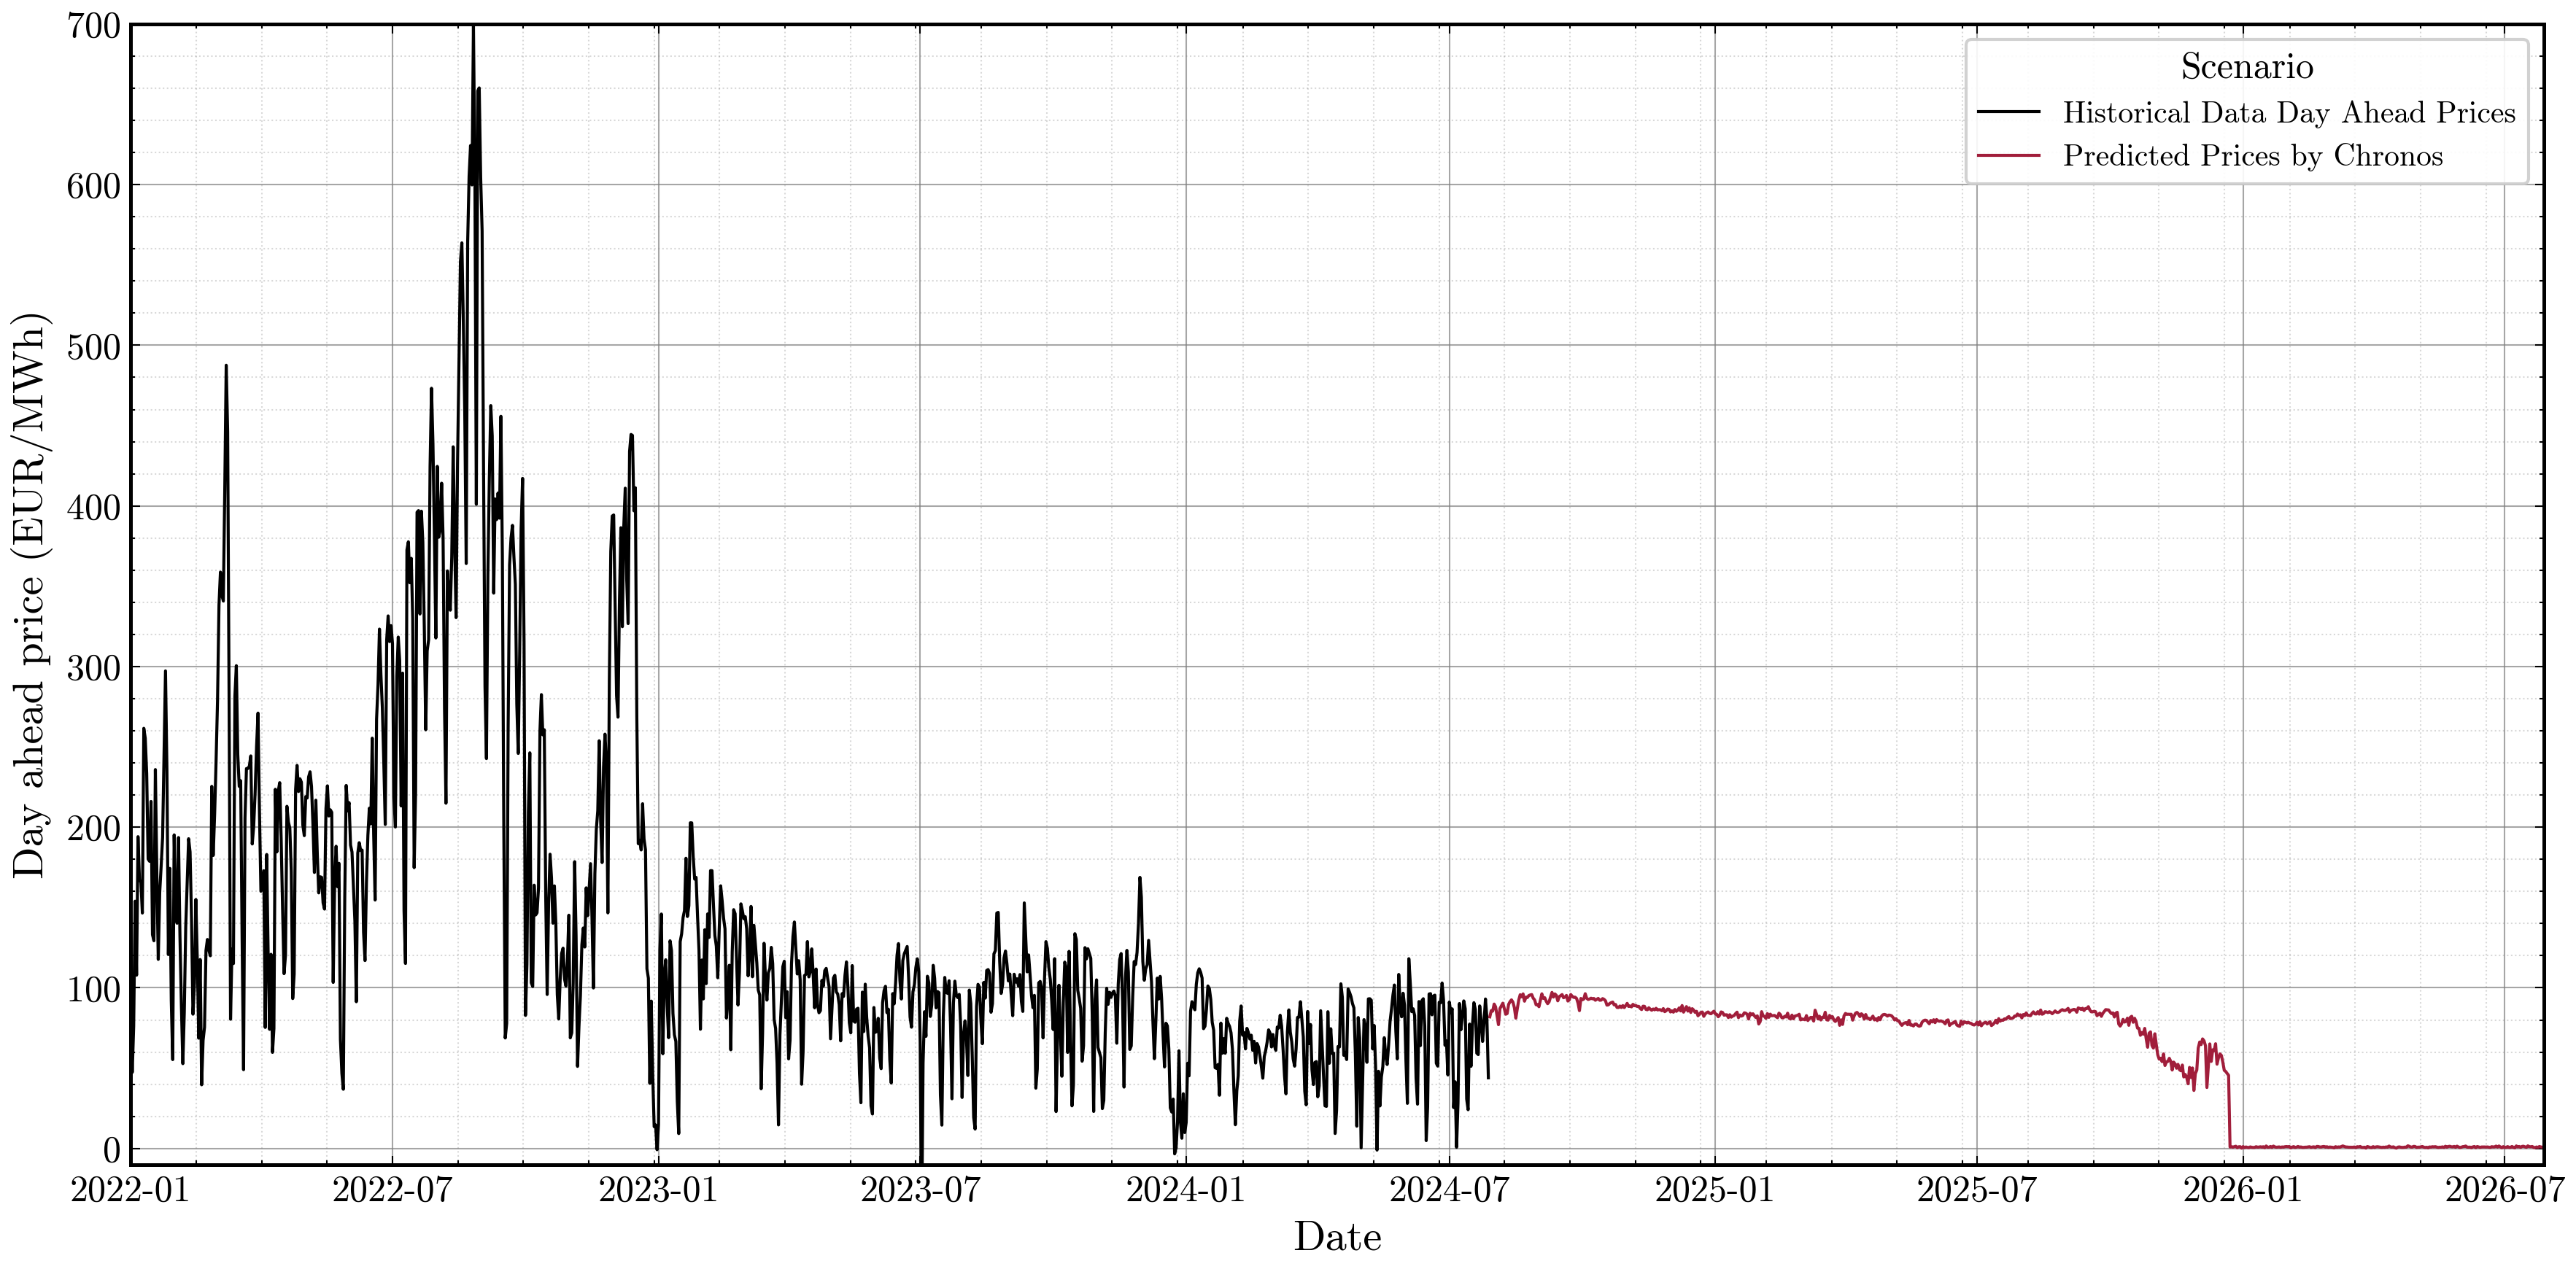

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots  # Import scienceplots package

# Load the CSV files
df_chronos = pd.read_csv(
    '../chronos/chronos_forecasts_large.csv', index_col='date')
# Ensure datetime format for proper plotting
df_chronos.index = pd.to_datetime(df_chronos.index)

# Load true forecast values
df_true = pd.read_csv(
    '/Users/skyfano/Documents/Masterarbeit/Prediction_of_energy_prices/data/Final_data/final_data_no_lags.csv')

# Select only the Day-ahead price column and the Date column for df_true
df_true = df_true[['Date', 'Day_ahead_price (€/MWh)']]
df_true.rename(columns={'Date': 'date'}, inplace=True)
df_true['date'] = pd.to_datetime(df_true['date'])  # Ensure datetime format
df_true.set_index('date', inplace=True)

# Concatenate the dataframes along columns
merged_df = pd.concat([df_chronos, df_true], axis=1)

# Apply the SciencePlots style
plt.style.use(['science', 'no-latex'])

# Set figure properties
plt.figure(figsize=(12, 6), dpi=300)

# Plot the historical data (from df_true) in one color
if 'Day_ahead_price (€/MWh)' in df_true.columns:
    plt.plot(df_true.index, df_true['Day_ahead_price (€/MWh)'],
             label='Historical Data Day Ahead Prices', color='black', linewidth=1)

# Plot the forecast data (from df_chronos) in a different color
if 'Day_ahead_price (€/MWh)' in df_chronos.columns:
    plt.plot(df_chronos.index, df_chronos['Day_ahead_price (€/MWh)'],
             label='Predicted Prices by Chronos', color='#A11E3B', linewidth=1, linestyle='-')

# Customize axis labels and their font sizes
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Day ahead price (EUR/MWh)", fontsize=14, fontweight='bold')

# Adjust the range of the x-axis and y-axis
plt.xlim([pd.Timestamp('2022-01-01'), df_chronos.index.max()])
plt.ylim([-10, 700])

# Adjust tick label font size for x and y axes
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Add legend in the upper right corner
plt.legend(
    title="Scenario", fontsize=10, title_fontsize='12',
    loc='upper right', frameon=True, fancybox=True, shadow=False, framealpha=0.9
)

# Customize grid and make plot borders more visible
plt.grid(True, which='major', linestyle='-',
         linewidth=0.5, color='gray', alpha=0.7)
plt.grid(True, which='minor', linestyle=':',
         linewidth=0.5, color='gray', alpha=0.3)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()